<div class="alert alert-block alert-info">
    <h1>Introduction to Tensorflow with Keras</h1>
    <h3>Author: Kaushik Manjunatha </h2>
    <h4>This is a simple tutorial to work with TensorFlow and Keras</h3>

    
</div>

One of the most well known deep learning frameworks is tensorflow with a keras backend.

One core advantage of deep learning frameworks is that they let us quickly piece together models consisting of different types of layers without having to worry about how to train the network using backpropagation.

Tensorflow, as the name suggests, works on tensors. A [tensor](https://en.wikipedia.org/wiki/Tensor#As_multidimensional_arrays) can be interpreted as a multidimensional array or a matrix of higher order (e.g. a matrix with dimensions $d_0 \times d_1 \times \dots \times d_n$). Tensorflow knows how to train a model by using tensors and a method called [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).

A tensorflow model is then a sequence of operations on a tensor. Examples for these operations are applying an activation function, multiplying a tensor by a weight matrix or adding tensors. Tensorflow builds a computation graph of these operations, allowing it to apply the [chain rule ](https://en.wikipedia.org/wiki/Chain_rule) to each of the operations in the computation graph to compute the gradient in respect to each trainable weight in the model.

## Types of layers in Tensorflow with Keras

Tensorflow comes with a set of predefined layers. Here a few:

## [Core Layers](https://keras.io/api/layers/core_layers/)

### [Input Object](https://keras.io/api/layers/core_layers/input/)
Instantiates a tensor object on which operations can be performed. The input object has no trainable weights and is used for converting the input to our model into a tensor. The most important parameter here is *shape*, which tells us the dimensionality of the input to our model. **Attention:** The input object is the only part of the model where you need to specify the dimensionality of the input. All subsequent layers automatically figure out the dimensionality of their respective inputs.


### [Dense Layer](https://keras.io/api/layers/core_layers/dense/)
Creates a fully connected neural network layer. Here you can specify the output dimension (*units*) and the activation function (*activation*).

### [Activation Layer](https://keras.io/api/layers/core_layers/activation/)
Applies an activation function to an output of a model. Has no trainable weights.

### [Embedding Layer](https://keras.io/api/layers/core_layers/embedding/)
For NLP applications inputs are usually given as integer indexes. This is similar to one hot embeddings. In contrast to what we saw in previous assignments, the one hot embedding of a token used here is just an integer corresponding to the index of the one hot embedding that is $1$. Example: Traditional one hot embedding of a word might be $\vec{w} = \begin{pmatrix} 0 & 0 & 0 & 1 & 0 & 0\end{pmatrix}^T$. Then the integer encoding of the word would be $w_{ie} = 3$.

The embedding layer turns the integer encoded tokens into $n$-dimensional vectors. The parameters for the embedding layer are the input dimension (*input_dim*, size of vocabulary) and the output dimension (*output_dim*, size of the embeddings). Usually the weights of this layer are trainable. It is also possible to provide the weights using pretrained embeddings (e.g. Word2Vec, FastText) and set the weights to non trainable.

---


## [Recurrent Layers](https://keras.io/api/layers/recurrent_layers/)

### [LSTM Layer](https://keras.io/api/layers/recurrent_layers/lstm/)

A simple LSTM layer. The most important parameter is *units*, which defines the dimensionality of the output.  
Other parameters include:
- *return_sequences*: If this is set to *True*, the LSTM will return all outputs (one per input). Default is *False*, meaning the LSTM only returns the output of the last time step.
- *return_states*: If this is set to *True*, the LSTM will return the last hidden state alongside the output of the LSTM. Default is *False*, meaning the LSTM will only return the output of the last timestep and not the last hidden state.

### [TimeDistributed Layer](https://keras.io/api/layers/recurrent_layers/time_distributed/)

This layer is a wrapper around a standard layer which allows us to apply that layer to a sequence of inputs.  
Example: Say you have an LSTM that returns a sequence of outputs (one per input, *return_sequences* is set to *True*). Now you want to apply a fully connected dense layer to this sequences. Assume each output of the sequence has a length of $32$. This would mean we want a fully connected layer with $32$ inputs and apply it to each element of the sequence. For this we can create the dense layer the following way: ```dense_layer = TimeDistributed(Dense(32))```

## Example 1: XOR Problem

### Defining the architecture of the model

Let us create a simple neural network to solve the xor problem.

This network should have inputs of size $2$, a single hidden layer and an output layer, producing outputs of size $1$.

The following cell shows how to define this model with tensorflow / keras.

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define a basic neural network for the xor problem
training_data = [
    ([0, 0], 0), # 0 xor 0 = 0
    ([0, 1], 1), # 0 xor 1 = 1
    ([1, 0], 1), # 1 xor 0 = 1
    ([1, 1], 0)  # 1 xor 1 = 0
]

# Split the training data into two lists X (inputs) and Y (outputs)
X, Y = zip(*training_data)
print('X', X)
print('Y', Y)
print()
# Our inputs have a dimensionality of 2, so create an input object for this
# Notice that the shape is given as the tuple (2, ), not the integer 2

input_object = Input(shape=(2,), name='Input')

# Create a dense NN layer with 4 outputs
hidden_layer = Dense(32, activation='relu')
# Apply this to the inputs
y_hidden = hidden_layer(input_object)

# Create another dense NN layer with a single output
output_layer = Dense(1, activation='sigmoid', name='Output')
# Apply the output of the hidden layer to this layer
y = output_layer(y_hidden)

# Piece everything together into a model
model = Model(input_object, y, name='XOR_Model')

# Print a summary of our model
model.summary()

X ([0, 0], [0, 1], [1, 0], [1, 1])
Y (0, 1, 1, 0)

Model: "XOR_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                96        
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


## Example 1: XOR Problem

### Making the model trainable

To make the model trainable we need to compile it. For this we need the following three parameters:

- loss: The loss function of our network (e.g. cross-entropy, mean square error, ...)
- optimizer: How we minimize the loss of the network (almost always Adam)
- metrics: Which metrics you want to evaluate during training (usually Accuracy)

After this we train our model using the method ```fit```. This method needs the following parameters:

- x: The inputs to the model. Here you give all inputs at once
- y: The desired outputs of the model. You give all at once
- epochs: Number of epochs to train
- batch_size: How many samples the model should look at for one update of the gradient

In [2]:
# Compile the model with the loss, ...
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['accuracy', 'binary_accuracy']
)

# Train the model on the inputs
history = model.fit(
    x=X,
    y=Y,
    epochs=500,
    batch_size=2,
    verbose=0 # Do not print after each epoch (we have 500 epochs and don't want to clutter the output)
)

# Predict all outputs
predictions = model.predict(X)

print('Input   Predicted   True_Output')
for xi, yp, yi in zip(X, predictions, Y):
    print(f'{str(xi):8}{yp[0]:9.2f}{yi:14.2f}')


Input   Predicted   True_Output
[0, 0]       0.41          0.00
[0, 1]       0.69          1.00
[1, 0]       0.82          1.00
[1, 1]       0.20          0.00


### Plotting the model history

The training history of the model is stored in the variable ```history```.

We can access the loss, accuracy and additional metrics as:

```history.history['loss'], history.history[metric], ...```

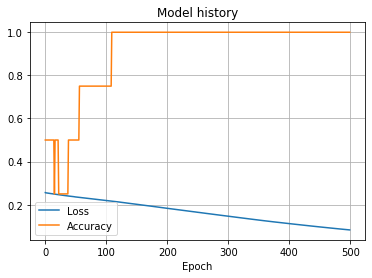

In [3]:
import matplotlib.pyplot as plt

plt.title('Model history')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')


plt.xlabel('Epoch')
plt.legend()
plt.grid()